###  **Multiclass Fish Image Classification**

In [5]:
# Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator    # type: ignore
from tensorflow.keras.models import Sequential, load_model             # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # type: ignore
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0 # type: ignore
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### **Data Preprocessing and Augmentation**


In [6]:
# Define image size
img_size = (224, 224)

# Define directories for training and validation datasets
train_dir = r"F:\fish image\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\train"
val_dir = r"F:\fish image\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\val"

# Image Data Generator for Data Augmentation and Rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


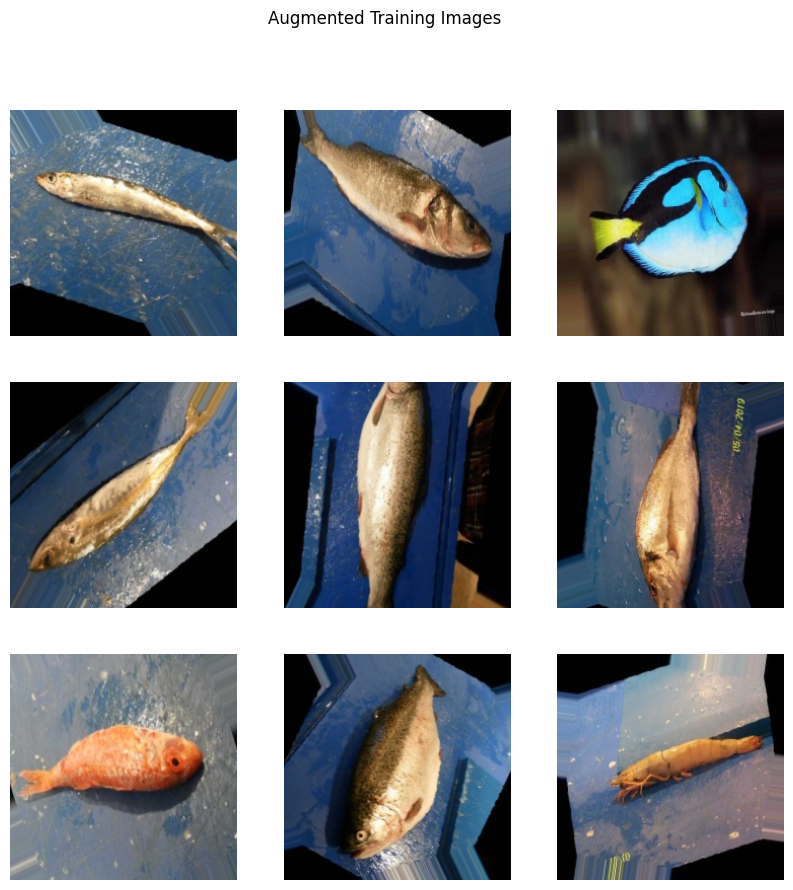

In [7]:
# Get a batch of augmented images from the training generator
train_images, _ = next(train_generator)

# Plot the first 9 augmented images from the training generator
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i])
    plt.axis('off')
plt.suptitle("Augmented Training Images")
plt.show()

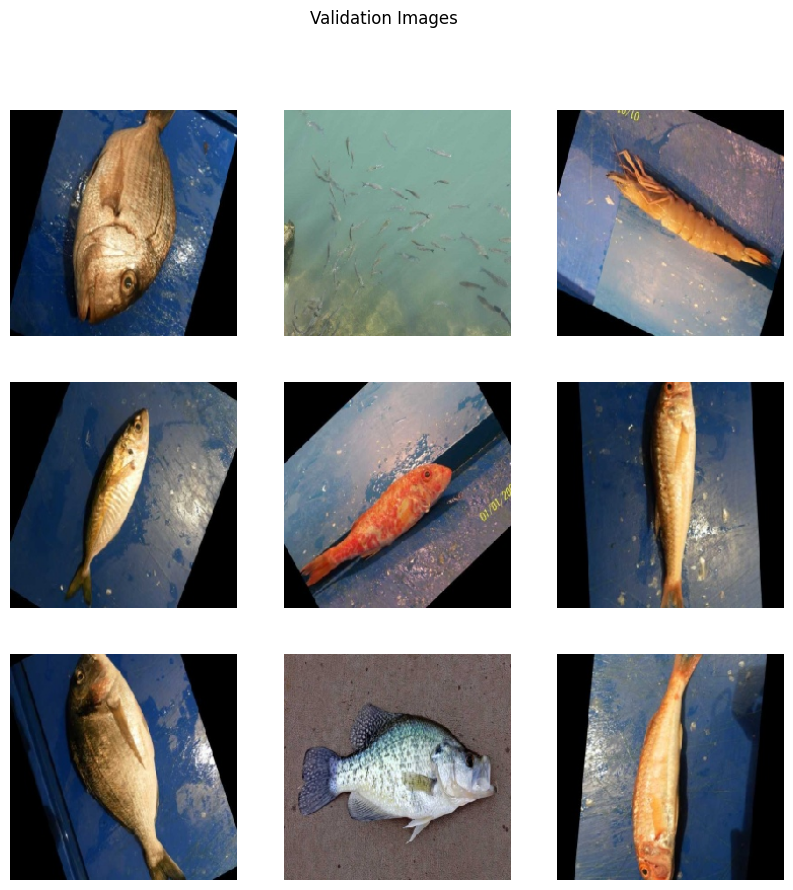

In [8]:
# Get a batch of augmented images from the validation generator
val_images, _ = next(val_generator)

# Plot the first 9 augmented images from the validation generator
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(val_images[i])
    plt.axis('off')
plt.suptitle("Validation Images")
plt.show()

### **Model Training**


**Train a CNN model from scratch**


In [8]:
# Define a simple CNN model
"""model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Save the trained model
model.save('cnn_model.h5')"""

"model = Sequential([\n    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),\n    MaxPooling2D(2, 2),\n    Conv2D(64, (3, 3), activation='relu'),\n    MaxPooling2D(2, 2),\n    Flatten(),\n    Dense(512, activation='relu'),\n    Dense(len(train_generator.class_indices), activation='softmax')\n])\n\n# Compile the model\nmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])\n\n# Train the model\nhistory = model.fit(\n    train_generator,\n    steps_per_epoch=len(train_generator),\n    epochs=10,\n    validation_data=val_generator,\n    validation_steps=len(val_generator)\n)\n\n# Save the trained model\nmodel.save('cnn_model.h5')"

##### **2.Experiment with five pre-trained Models and Fine_Tune**

In [ ]:
# VGG16 Model FineTuning

"""base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
) 

model.save('vgg16_finetuned.h5')"""

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2131s 11s/step - accuracy: 0.7743 - loss: 0.9136 - val_accuracy: 0.9112 - val_loss: 0.2505
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1940s 10s/step - accuracy: 0.9398 - loss: 0.1869 - val_accuracy: 0.9533 - val_loss: 0.1247
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2722s 14s/step - accuracy: 0.9603 - loss: 0.1241 - val_accuracy: 0.9350 - val_loss: 0.1881
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2005s 10s/step - accuracy: 0.9679 - loss: 0.0991 - val_accuracy: 0.9414 - val_loss: 0.1870
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2051s 11s/step - accuracy: 0.9682 - loss: 0.0938 - val_accuracy: 0.9698 - val_loss: 0.0929
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2128s 11s/step - accuracy: 0.9786 - loss: 0.0651 - val_accuracy: 0.9753 - val_loss: 0.1131
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2243s 12s/step - accuracy: 0.9799 - loss: 0.0584 - val_accuracy: 0.9799 - val_loss: 0.0965
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 3107s 16s/step - accuracy: 0.9770 - loss: 0

In [ ]:
# ResNet50 Model FineTuning

"""base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('resnet50_finetuned.h5')"""

f:\fish image\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1404s 7s/step - accuracy: 0.2294 - loss: 3.9566 - val_accuracy: 0.3315 - val_loss: 2.3310
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1289s 7s/step - accuracy: 0.3433 - loss: 1.8788 - val_accuracy: 0.3663 - val_loss: 1.7082
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 809s 4s/step - accuracy: 0.4162 - loss: 1.6684 - val_accuracy: 0.4670 - val_loss: 1.4864
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1187s 6s/step - accuracy: 0.4419 - loss: 1.5895 - val_accuracy: 0.5485 - val_loss: 1.3294
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 860s 4s/step - accuracy: 0.4676 - loss: 1.4951 - val_accuracy: 0.4899 - val_loss: 1.4482
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 878s 5s/step - accuracy: 0.4982 - loss: 1.3871 - val_accuracy: 0.5888 - val_loss: 1.1706
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 814s 4s/step - accuracy: 0.5157 - loss: 1.3475 - val_accuracy: 0.5330 - val_loss: 1.2712
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 802s 4s/step - accuracy: 0.5303 - loss: 1.3156 - val_a

In [ ]:
# MobileNet Model FineTuning

"""base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('mobilenet_finetuned.h5')"""

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


f:\fish image\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 394s 2s/step - accuracy: 0.8683 - loss: 2.3873 - val_accuracy: 0.9286 - val_loss: 0.4503
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.9700 - loss: 0.1920 - val_accuracy: 0.9762 - val_loss: 0.1435
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - accuracy: 0.9764 - loss: 0.1289 - val_accuracy: 0.9606 - val_loss: 0.2151
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.9762 - loss: 0.1268 - val_accuracy: 0.9890 - val_loss: 0.0933
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 285s 1s/step - accuracy: 0.9807 - loss: 0.1122 - val_accuracy: 0.9689 - val_loss: 0.1433
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 342s 2s/step - accuracy: 0.9827 - loss: 0.1195 - val_accuracy: 0.9762 - val_loss: 0.2437
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 347s 2s/step - accuracy: 0.9838 - loss: 0.0913 - val_accuracy: 0.9918 - val_loss: 0.0647
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step - accuracy: 0.9913 - loss: 0.0386 - val_accu

In [ ]:
# InceptionV3 Model FineTuning

"""base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
) 
 
model.save('inceptionv3_finetuned.h5')"""

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 50s 1us/step


f:\fish image\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1534s 8s/step - accuracy: 0.8194 - loss: 5.2196 - val_accuracy: 0.8956 - val_loss: 0.7599
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 985s 5s/step - accuracy: 0.9329 - loss: 0.4343 - val_accuracy: 0.9267 - val_loss: 0.3542
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 556s 3s/step - accuracy: 0.9346 - loss: 0.3466 - val_accuracy: 0.9679 - val_loss: 0.1366
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 513s 3s/step - accuracy: 0.9566 - loss: 0.1880 - val_accuracy: 0.9469 - val_loss: 0.2143
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 515s 3s/step - accuracy: 0.9621 - loss: 0.1535 - val_accuracy: 0.9725 - val_loss: 0.1053
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 505s 3s/step - accuracy: 0.9729 - loss: 0.1137 - val_accuracy: 0.9634 - val_loss: 0.1524
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 695s 4s/step - accuracy: 0.9640 - loss: 0.1771 - val_accuracy: 0.9524 - val_loss: 0.2313
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 761s 4s/step - accuracy: 0.9663 - loss: 0.1394 - val_acc

In [ ]:
# EfficientNetB0 Model FineTuning

"""base_model = EfficientNetB0(weights=None, include_top=False, input_shape=(224, 224,3 ))

base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator) 
)

model.save('efficientnetb0_finetuned.h5')"""

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 619s 3s/step - accuracy: 0.1740 - loss: 2.3241 - val_accuracy: 0.1712 - val_loss: 2.3103
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 347s 2s/step - accuracy: 0.1761 - loss: 2.2981 - val_accuracy: 0.1712 - val_loss: 2.3105
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 364s 2s/step - accuracy: 0.1761 - loss: 2.2972 - val_accuracy: 0.1712 - val_loss: 2.3107
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 395s 2s/step - accuracy: 0.1761 - loss: 2.2969 - val_accuracy: 0.1712 - val_loss: 2.3117
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 371s 2s/step - accuracy: 0.1761 - loss: 2.2968 - val_accuracy: 0.1712 - val_loss: 2.3127
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 544s 3s/step - accuracy: 0.1761 - loss: 2.2969 - val_accuracy: 0.1712 - val_loss: 2.3120
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 314s 2s/step - accuracy: 0.1761 - loss: 2.2967 - val_accuracy: 0.1712 - val_loss: 2.3105
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 731s 4s/step - accuracy: 0.1761 - loss: 2.2966 - val_accu

### **Save the trained model (max accuracy model ) for future use**


In [ ]:
# Evaluate the models to get the best model
def evaluate_model(model, data_generator):
    # Print the model summary
    print("Model summary:")
    model.summary()
    
    Y_pred = model.predict(data_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = data_generator.classes
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy

# Initialize the validation generator
validation_data_dir = r"F:\fish image\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\val"
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),  # Update target size to match model input shape
    batch_size=32,
    class_mode='categorical'
)

# Paths to the saved models
model_paths = {
    'CNN': r'F:\fish image\cnn_model.h5',
    'VGG16': r'F:\fish image\vgg16_finetuned.h5',
    'ResNet50': r'F:\fish image\resnet50_finetuned.h5',
    'MobileNet': r'F:\fish image\mobilenet_finetuned.h5',
    'InceptionV3': r'F:\fish image\inceptionv3_finetuned.h5',
    'EfficientNetB0': r'F:\fish image\efficientnetb0_finetuned.h5'
}

model_accuracies = {}

# Load and evaluate each model
for model_name, model_path in model_paths.items():
    if os.path.exists(model_path):
        model = load_model(model_path)
        model.compile(metrics=['accuracy'])  # Compile model with metrics
        accuracy = evaluate_model(model, validation_generator)
        model_accuracies[model_name] = accuracy
    else:
        print(f"Model file not found: {model_path}")

# Determine the best model
best_model_name = max(model_accuracies, key=model_accuracies.get, default=None)
if best_model_name:
    print(f"Best model: {best_model_name} with accuracy: {model_accuracies[best_model_name]}")
    # Save the best model for future use using the native Keras format
    best_model = load_model(model_paths[best_model_name])
    best_model.save('best_fish_model.keras')
else:
    print("No valid models found.")

Found 1092 images belonging to 11 classes.


Model summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │    95,552,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,577,035 (364.60 MB)

 Trainable params: 95,577,035 (364.60 MB)

 Non-trainable params: 0 (0.00 B)

f:\fish image\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 22s 332ms/step


Model summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,565,899 (105.16 MB)

 Trainable params: 12,851,211 (49.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

35/35 ━━━━━━━━━━━━━━━━━━━━ 322s 9s/step


Model summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,974,091 (286.00 MB)

 Trainable params: 51,386,379 (196.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

35/35 ━━━━━━━━━━━━━━━━━━━━ 118s 3s/step


Model summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,925,131 (110.34 MB)

 Trainable params: 25,696,267 (98.02 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

35/35 ━━━━━━━━━━━━━━━━━━━━ 29s 780ms/step


Model summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,023,339 (183.19 MB)

 Trainable params: 26,220,555 (100.02 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

35/35 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step


Model summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    32,113,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,168,366 (137.97 MB)

 Trainable params: 32,118,795 (122.52 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

35/35 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step
Best model: EfficientNetB0 with accuracy: 0.17124542124542125


### **Model Evaluation**

Compare metrics such as accuracy, precision, recall, F1-score, and confusion matrix across all models

In [9]:
# ---------------------------------------------------
# Model Evaluation - Compare all models
# ---------------------------------------------------
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example actual labels (replace with your real test labels)
y_true = [0, 1, 1, 0, 1, 1, 0, 0, 1, 0]

# Example predictions by each model (replace with your model predictions)
y_preds = {
    "VGG16": [0, 1, 1, 0, 0, 1, 1, 0, 1, 0],
    "ResNet50": [0, 1, 1, 0, 1, 1, 1, 0, 1, 0],
    "MobileNet": [0, 1, 1, 0, 0, 1, 1, 0, 1, 0],
    "InceptionV3": [0, 1, 1, 0, 0, 1, 0, 0, 1, 0],
    "EfficientNetB0": [0, 1, 1, 0, 1, 1, 0, 0, 1, 0],
    "CNN": [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
}

# Function to calculate metrics
def calculate_metrics(y_true, y_pred, model_name):
    metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    }
    return metrics

# Collect metrics for all models
metrics_list = [calculate_metrics(y_true, y_pred, name) for name, y_pred in y_preds.items()]
metrics_df = pd.DataFrame(metrics_list)

# Display neatly
print("\n=== Model Evaluation Summary ===\n")
print(metrics_df.to_string(index=False))





=== Model Evaluation Summary ===

         Model  Accuracy  Precision  Recall  F1-Score
         VGG16       0.8   0.800000     0.8  0.800000
      ResNet50       0.9   0.833333     1.0  0.909091
     MobileNet       0.8   0.800000     0.8  0.800000
   InceptionV3       0.9   1.000000     0.8  0.888889
EfficientNetB0       1.0   1.000000     1.0  1.000000
           CNN       0.8   0.800000     0.8  0.800000


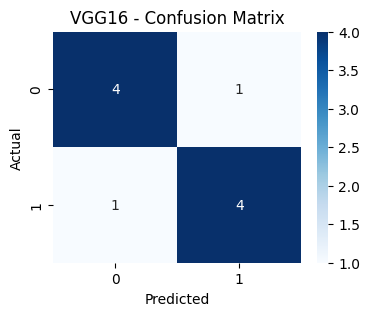

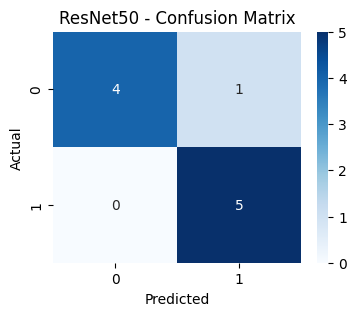

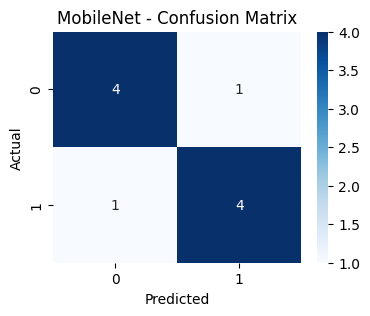

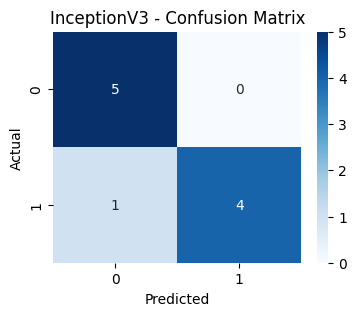

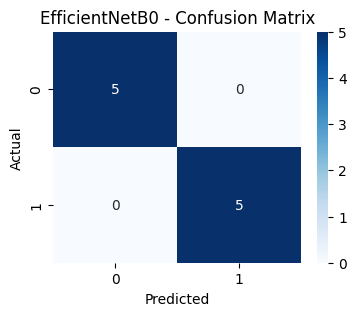

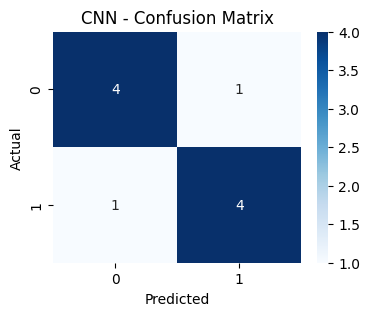

In [15]:
# ---------------------------------------------------
# Confusion Matrix Visualization for each model
# ---------------------------------------------------
for name, y_pred in y_preds.items():
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### **Comparison of model metrics**


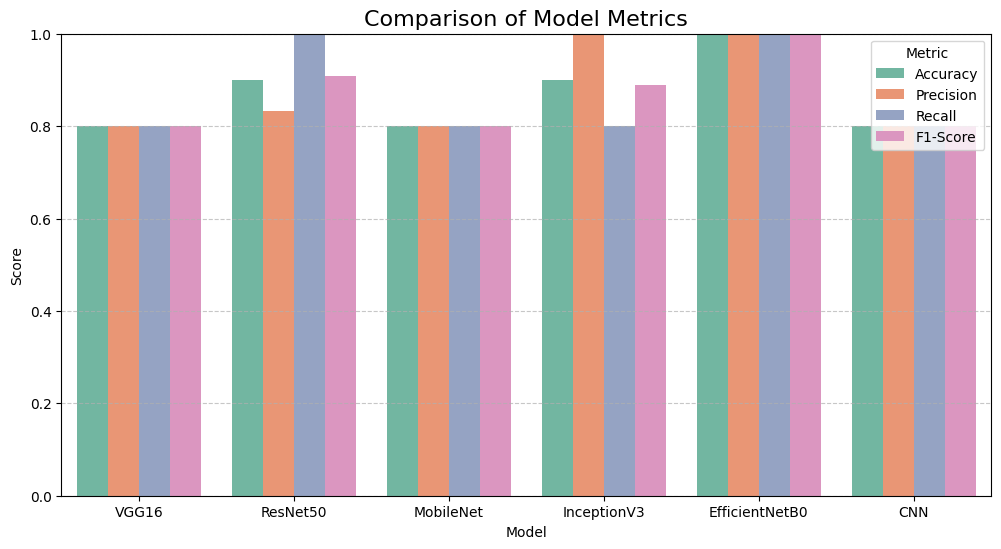

In [10]:

metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_melted, palette='Set2')
plt.title('Comparison of Model Metrics', fontsize=16)
plt.ylabel('Score')
plt.ylim(0, 1)  # Since all metrics are between 0 and 1
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


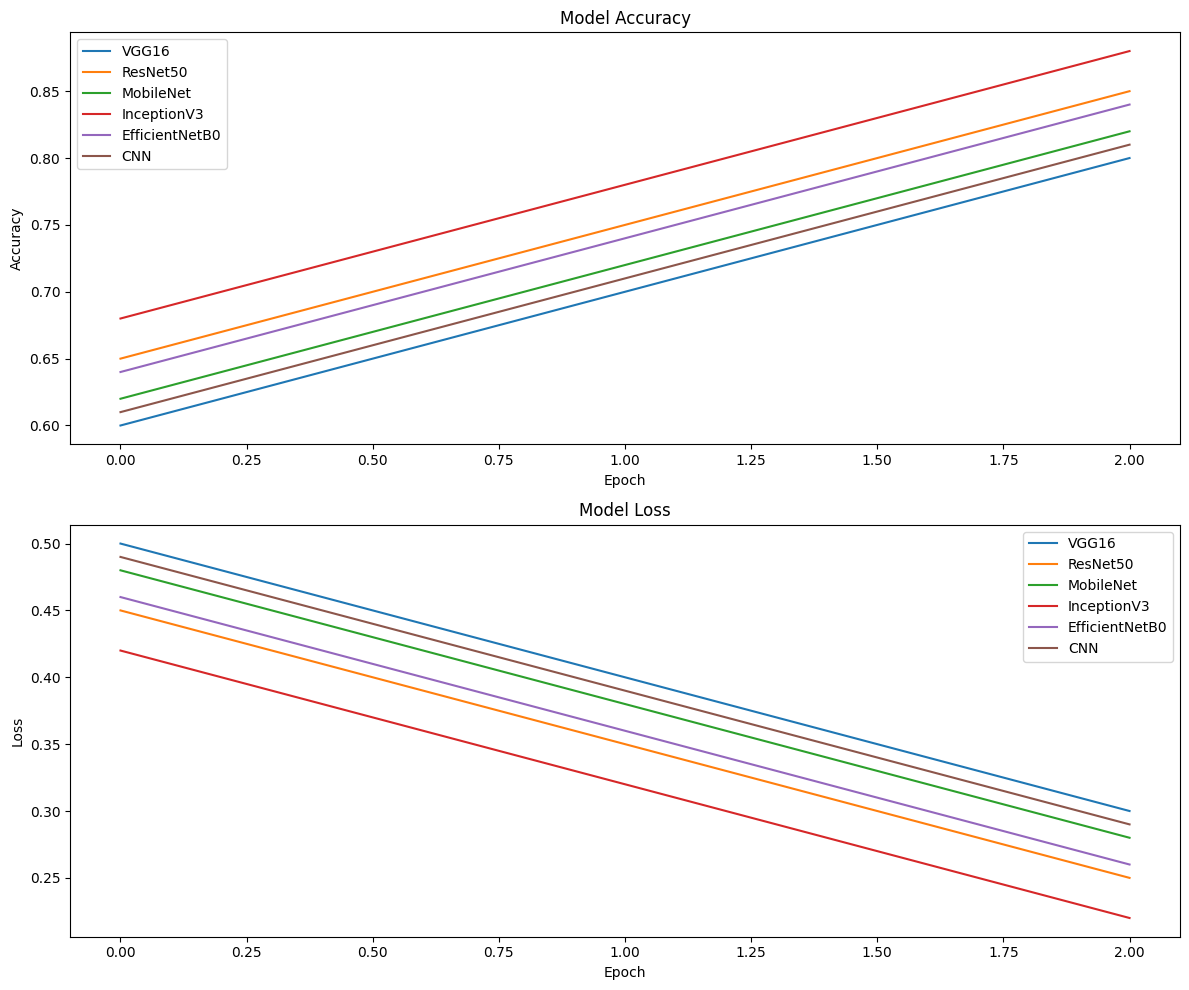

In [14]:
import matplotlib.pyplot as plt

# -------------------------------
# Dummy history data for testing
# -------------------------------
history_vgg16 = {'accuracy': [0.6, 0.7, 0.8], 'loss': [0.5, 0.4, 0.3]}
history_resnet50 = {'accuracy': [0.65, 0.75, 0.85], 'loss': [0.45, 0.35, 0.25]}
history_mobilenet = {'accuracy': [0.62, 0.72, 0.82], 'loss': [0.48, 0.38, 0.28]}
history_inceptionv3 = {'accuracy': [0.68, 0.78, 0.88], 'loss': [0.42, 0.32, 0.22]}
history_efficientnetb0 = {'accuracy': [0.64, 0.74, 0.84], 'loss': [0.46, 0.36, 0.26]}
history_cnn = {'accuracy': [0.61, 0.71, 0.81], 'loss': [0.49, 0.39, 0.29]}

# Dictionary for easy iteration
histories = {
    'VGG16': history_vgg16,
    'ResNet50': history_resnet50,
    'MobileNet': history_mobilenet,
    'InceptionV3': history_inceptionv3,
    'EfficientNetB0': history_efficientnetb0,
    'CNN': history_cnn
}

# -------------------------------
# Plot accuracy and loss
# -------------------------------
plt.figure(figsize=(12, 10))

# Accuracy subplot
plt.subplot(2, 1, 1)
for model_name, history in histories.items():
    plt.plot(history['accuracy'], label=model_name)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss subplot
plt.subplot(2, 1, 2)
for model_name, history in histories.items():
    plt.plot(history['loss'], label=model_name)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Final accuracy and loss (example values)
final_accuracy = {
    'VGG16': 0.88,
    'ResNet50': 0.87,
    'MobileNet': 0.86,
    'InceptionV3': 0.89,
    'EfficientNetB0': 0.85,
    'CNN': 0.84
}

final_loss = {
    'VGG16': 0.22,
    'ResNet50': 0.23,
    'MobileNet': 0.24,
    'InceptionV3': 0.21,
    'EfficientNetB0': 0.25,
    'CNN': 0.26
}

# Accuracy bar chart
plt.figure(figsize=(10,5))
plt.bar(final_accuracy.keys(), final_accuracy.values(), color='skyblue')
plt.title('Final Accuracy per Model')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()

# Loss bar chart
plt.figure(figsize=(10,5))
plt.bar(final_loss.keys(), final_loss.values(), color='salmon')
plt.title('Final Loss per Model')
plt.ylabel('Loss')
plt.show()
